# Summary of Steps taken and performance achieved

## Data

#### Load Data

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D   
import matplotlib.ticker as mticker
from scipy.stats import reciprocal
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate #Additional scklearn functions
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from matplotlib.pylab import rcParams

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas.plotting import scatter_matrix

from copy import deepcopy

import tensorflow as tf
from sklearn.linear_model import LinearRegression, Ridge,LassoCV, Lasso, RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from tensorflow import keras
from keras.models import Sequential  # 선형 네트워크 스택을 정의하는데 사용함
from keras.layers import Dense  # Dense, 피드포워드 완전 연결 레이어

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR

import warnings
warnings.filterwarnings(action="ignore")

import time

In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
from pandas.core.frame import DataFrame
df = pd.read_csv('/content/drive/MyDrive/Flyash/modelC_flyash.csv') # temp

df.drop('ID', axis=1, inplace=True)
df.drop('LOI', axis=1, inplace=True)
df.drop('Amorphous Alumina', axis=1, inplace=True)
df.drop('Amorphous Silica', axis=1, inplace=True)

df

,Al2O3,CaO,Fe2O3,SiO2,MgO,Na2O+0.658K2O,Sum of amorphous aluminosilicates
0,20.9,2.7,5.2,64.8,1.4,1.7,60.00
1,20.8,2.7,5.0,65.0,1.4,1.8,58.00
2,20.1,4.1,8.7,58.8,2.0,1.8,52.00
3,22.5,3.1,7.7,60.4,1.1,1.4,56.00
4,20.0,2.9,5.1,64.9,1.1,1.3,55.00
5,21.5,3.8,8.2,58.6,1.4,1.3,53.00
6,19.5,5.3,6.0,58.3,2.5,2.1,54.00
7,17.9,3.6,6.0,64.8,1.4,2.0,53.00
8,21.4,3.5,5.9,58.8,1.3,1.9,54.00
9,20.4,2.6,5.0,64.5,1.2,1.3,53.00


#### Data Distribution

In [ ]:
features = np.array(df.columns)
features

array(['Al2O3', 'CaO', 'Fe2O3', 'SiO2', 'MgO', 'Na2O+0.658K2O',
       'Sum of amorphous aluminosilicates'], dtype=object)

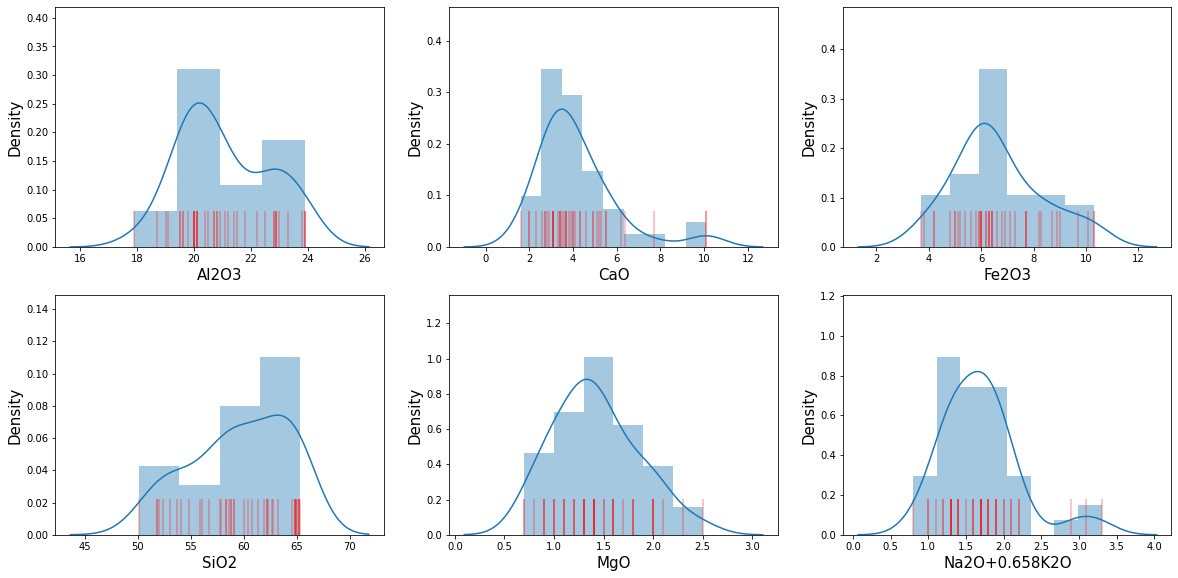

In [ ]:
var=np.arange(1,len(df.columns))
var

figsize(20, 15)
for i in var:
    plt.subplot(3,3,i)
    p = sns.distplot(df.iloc[:,(i-1)], rug=True,
                     rug_kws = {'color':'r', 'alpha':0.3, 'linewidth':1.5, 'height':0.15})      # bins = n_samples, dist
    p.set_xlabel(features[i-1], fontsize=15)
    p.set_ylabel('Density', fontsize=15)

plt.savefig('./distrb_input_feature.png')

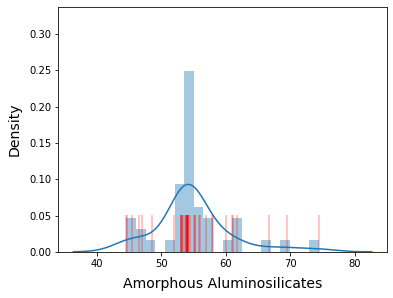

In [ ]:
plt.subplots(figsize=(6,4.5))
p = sns.distplot(df.iloc[:,6], rug=True,
                  rug_kws = {'color':'r', 'alpha':0.3, 'linewidth':1.5, 'height':0.15})      # bins = n_samples, dist
p.set_xlabel('Amorphous Aluminosilicates', fontsize=14, labelpad=8)
p.set_ylabel('Density', fontsize=14, labelpad=8)

plt.subplots_adjust(left=0.14)
plt.savefig('./distrb_output_feature.png')

In [ ]:
df.iloc[:,:6].describe()

,Al2O3,CaO,Fe2O3,SiO2,MgO,Na2O+0.658K2O
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,21.062791,4.155814,6.637209,59.604651,1.420930,1.695349
std,1.587004,1.823563,1.698322,4.580235,0.427929,0.516376
min,17.900000,1.600000,3.700000,50.100000,0.700000,0.800000
25%,20.000000,3.100000,5.700000,56.350000,1.100000,1.300000
50%,20.700000,3.700000,6.300000,60.000000,1.400000,1.700000
75%,22.650000,4.900000,7.700000,63.850000,1.650000,1.900000
max,23.900000,10.100000,10.300000,65.300000,2.500000,3.300000


In [ ]:
df.iloc[:,6].describe()

count    43.000000
mean     54.933953
std       5.812683
min      44.600000
25%      53.205000
50%      54.000000
75%      55.900000
max      74.400000
Name: Sum of amorphous aluminosilicates, dtype: float64

#### Outliers



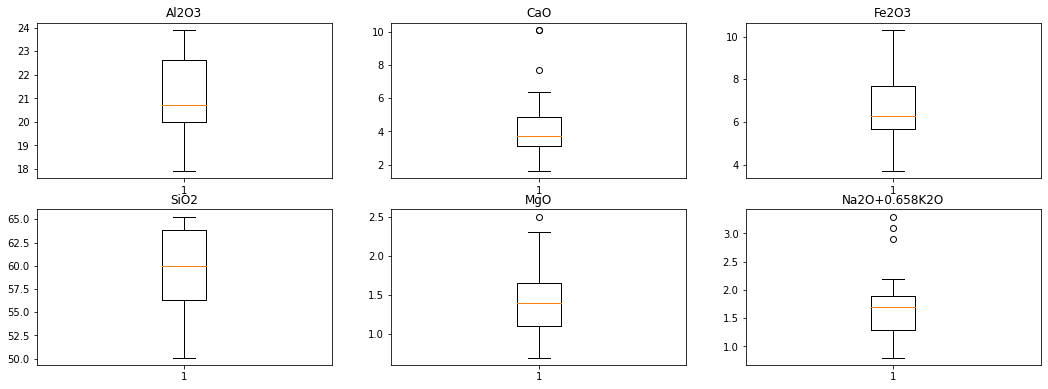

In [ ]:
figsize(18, 20)
for i in var:
    plt.subplot(6,3,i)
    plt.boxplot(df.iloc[:,(i-1)])
    plt.title(df.columns[i-1])

plt.savefig('./outliers.png')

A few variables a have some outliers. There are various methods of treating outliers. In this case, I am capping the outliers to the maximum possible value that is not an outlier.

In [ ]:
# Q1=np.percentile(df['Al2O3'],25)
# Q3=np.percentile(df['Al2O3'],75)
# IQR=Q3-Q1
# UL=Q3+1.5*IQR
# df.Al2O3=np.where(df.Al2O3>UL, UL, df.Al2O3)

In [ ]:
# Q1=np.percentile(df['CaO'],25)
# Q3=np.percentile(df['CaO'],75)
# IQR=Q3-Q1
# UL=Q3+1.5*IQR
# df.CaO=np.where(df.CaO>UL, UL, df.CaO)

In [ ]:
# Q1=np.percentile(df['Na2O+0.658K2O'],25)
# Q3=np.percentile(df['Na2O+0.658K2O'],75)
# IQR=Q3-Q1
# UL=Q3+1.5*IQR
# df['Na2O+0.658K2O'] = np.where(df['Na2O+0.658K2O'] > UL, UL, df['Na2O+0.658K2O'])

## Stratified Sampling

Multicollinearity 해결을 위해 PCA 하기 전에

표준화를 먼저해야한다.

표준화는 train data에 fit 해야하기 때문에

그 전에 Sampling 먼저 한다.

In [ ]:
tf.random.set_seed(21) 
np.random.seed(21)

In [ ]:
dist = [0.,
        df['Sum of amorphous aluminosilicates'].quantile(q=0.2,interpolation='nearest'),
        df['Sum of amorphous aluminosilicates'].quantile(q=0.4,interpolation='nearest'),
        df['Sum of amorphous aluminosilicates'].quantile(q=0.6,interpolation='nearest'),
        df['Sum of amorphous aluminosilicates'].quantile(q=0.8,interpolation='nearest'),
        np.inf]


df['Sum of amorphous aluminosilicates Cat'] = pd.cut(df['Sum of amorphous aluminosilicates'],    # Amorphous content 정도에 대한 카테고리 설정
                                     bins=dist, 
                                     labels=[1,2,3,4,5])

2    12
1    10
4     9
5     8
3     4
Name: Sum of amorphous aluminosilicates Cat, dtype: int64


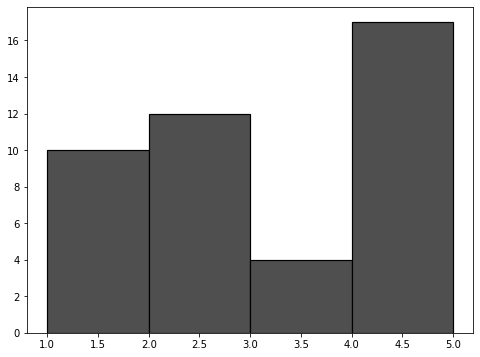

In [ ]:
# check 
print(df['Sum of amorphous aluminosilicates Cat'].value_counts())
figsize(8,6)
df['Sum of amorphous aluminosilicates Cat'].hist(color='#4F4F4F', grid=False, bins=4, edgecolor='black', linewidth=1.2)

In [ ]:
# Sampling based on caterogries
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in split.split(df, df['Sum of amorphous aluminosilicates Cat']):
    strat_train = df.loc[train_idx]
    strat_test = df.loc[test_idx]

In [ ]:
print(strat_train.shape, strat_test.shape)

(34, 8) (9, 8)


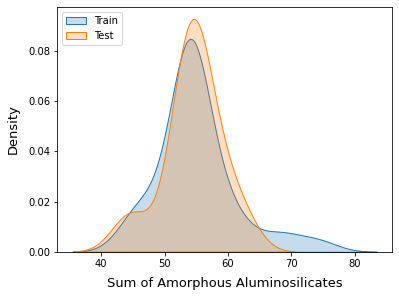

In [ ]:
plt.figure(figsize=(6, 4.5))
sns.kdeplot(strat_train['Sum of amorphous aluminosilicates'], fill=True, label="Train")
sns.kdeplot(strat_test['Sum of amorphous aluminosilicates'], fill=True,  label="Test")

plt.legend(loc='upper left')
plt.xlabel('Sum of Amorphous Aluminosilicates', fontsize=13, labelpad=8)
plt.ylabel('Density', fontsize=13, labelpad=8)
# plt.show()

plt.savefig('./stratified_sampling.png')

In [ ]:
# setting
for df_ in (strat_train, strat_test):
    # set_.drop('Sum of amorphous aluminosilicates Cat', axis=1, inplace=True)
    df_.reset_index(drop=True, inplace=True)
    df_['Sum of amorphous aluminosilicates'] = df_['Sum of amorphous aluminosilicates'].round()


#####(Versus Ordinary Sampling)

In [ ]:
X = df.drop('Sum of amorphous aluminosilicates', axis=1)
y = df['Sum of amorphous aluminosilicates']

sampling_X_train, sampling_X_test, sampling_y_train, sampling_y_test = train_test_split(X, y, test_size=0.2, random_state=42)


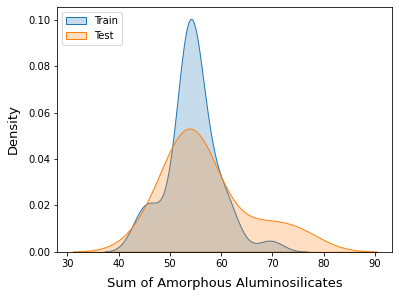

In [ ]:
plt.figure(figsize=(6, 4.5))
sns.kdeplot(sampling_y_train, fill=True, label="Train")
sns.kdeplot(sampling_y_test, fill=True,  label="Test")

plt.legend(loc='upper left')
plt.xlabel('Sum of Amorphous Aluminosilicates', fontsize=13, labelpad=8)
plt.ylabel('Density', fontsize=13, labelpad=8)
# plt.show()

plt.savefig('./nomal_sampling.png')

_strat_train  # round 안 된 train set

strat_train # round 된 train set

strat_test # round 된 test set

df     # round 된 df

## Feature Scale

In [ ]:
X_train = strat_train.drop('Sum of amorphous aluminosilicates', axis=1)
X_train.drop('Sum of amorphous aluminosilicates Cat', axis=1, inplace=True)
y_train = pd.DataFrame(strat_train['Sum of amorphous aluminosilicates'])

X_test = strat_test.drop('Sum of amorphous aluminosilicates', axis=1)
X_test.drop('Sum of amorphous aluminosilicates Cat', axis=1, inplace=True)
y_test = pd.DataFrame(strat_test['Sum of amorphous aluminosilicates'])

In [ ]:
scalerX = StandardScaler().fit(X_train)  
scalery = StandardScaler().fit(y_train)


X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train)

X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test)

# # Save scaler
# joblib.dump(scalerX, "./scalerX.save") 
# joblib.dump(scalery, "./scalery.save") 

# # And load...
# scaler = joblib.load(scaler_filename) 

In [ ]:
X_columns = df.iloc[:,0:6].columns
y_column = 'Sum of amorphous aluminosilicates'

In [ ]:
# 학습 가능한 데이터로 변환
y_train = np.ravel(y_train)
X_train = pd.DataFrame(X_train, columns=X_columns)
y_train = pd.Series(y_train, name='Sum of amorphous aluminosilicates')

y_test = np.ravel(y_test)
X_test = pd.DataFrame(X_test, columns=X_columns)
y_test = pd.Series(y_test, name='Sum of amorphous aluminosilicates')

In [ ]:
sc_strat_train = pd.DataFrame.copy(X_train)
sc_strat_train[y_column] = y_train
sc_strat_train['Sum of amorphous aluminosilicates Cat'] = strat_train['Sum of amorphous aluminosilicates Cat']

sc_strat_test = pd.DataFrame.copy(X_test)
sc_strat_test[y_column] = y_test

## 데이터분석 - Clustering, 샘플을 n개로 군집화

#### Elbow Method, K-means 클러스터링 k 결정

Cluster 간의 거리의 합을 나타내는 inertia가 급격히 떨어지는 구간이 생기는데 이 지점의 K 값을 군집의 개수로 사용. inertia_속성으로 확인 할 수 있다.

In [ ]:
cl=np.arange(1,9)  # k_range
ess=[]   # ineretia_

for i in cl:
    clust=KMeans(n_init=15, n_clusters=i)
    clust.fit(scaled_df.iloc[:,0:6])  # cluster 하는 이유.. 입력특성으로 추가하기 위해서이므로.. output 특성은 들어가지 않는 것 같음..
    error=clust.inertia_
    ess.append(error)

NameError: ignored

In [ ]:
a = pd.DataFrame({'clusters':cl, 'errors':ess})
plt.figure(figsize=(12,5))
sns.lineplot(a.clusters, a.errors)

elbow seen at 2 clusters

In [ ]:
clust=KMeans(n_init=15, n_clusters=2)
clust.fit(scaled_df.iloc[:,0:6])    # 군집화 Fitting
scaled_df['cluster']=clust.predict(scaled_df.iloc[:,0:6])
scaled_df.cluster=pd.Categorical(scaled_df.cluster)

In [ ]:
scaled_df.cluster.value_counts() ,  scaled_df.columns

#### 군집화 시각화 

군집화가 잘 되었는지 시각화 하기 위한, 차원축소(Dimension Reduction)

In [ ]:
def get_pca_data(data, n_components=2):
  pca = PCA(n_components=n_components)
  pca.fit(data)

  return pca.transform(data)

2D Scatter

In [ ]:
cluster_df = scaled_df.drop('Sum of amorphous aluminosilicates', axis=1)

In [ ]:
pca_data = get_pca_data(cluster_df.drop('cluster', axis=1))
pca_data.shape   # X 특성 2개로 줄어들었음.

In [ ]:
pd_pca = pd.DataFrame(pca_data,columns=['pca_component_1', 'pca_component_2'])
pd_pca['cluster'] = cluster_df['cluster']
pd_pca.head(3)

In [ ]:
sns.pairplot(pd_pca, hue='cluster', height=5, x_vars=['pca_component_1'], y_vars=['pca_component_2'])

3D scatter

In [ ]:
pca_data = get_pca_data(cluster_df.drop('cluster', axis=1), 3)  # 3차원으로 차원축소 (단지 시각화용으로)
pca_data.shape  

In [ ]:
pd_pca = pd.DataFrame(pca_data, columns = ['pca_component_1', 'pca_component_2', 'pca_component_3'])
pd_pca['Sum of amorphous aluminosilicates'] = scaled_df['Sum of amorphous aluminosilicates']
pd_pca['cluster'] = cluster_df['cluster']
pd_pca.head(3)

In [ ]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection='3d')

pd_pca['Sum of amorphous aluminosilicates'] -= pd_pca['Sum of amorphous aluminosilicates'].min()   # size 양수여야 하므로.


for i in range(2):
  ax.scatter(pd_pca.loc[pd_pca['cluster']==i, 'pca_component_1'],  # x좌표
             pd_pca.loc[pd_pca['cluster']==i, 'pca_component_2'],  # y좌표
             pd_pca.loc[pd_pca['cluster']==i, 'pca_component_3'],  # z좌표
             s = pd_pca.loc[pd_pca['cluster'] == i, 'Sum of amorphous aluminosilicates']*20,
             label = 'cluster' + str(i)     
             )  
  # 투명도 : 점의 겸칩정도, 크기 : output값의 양의 크기

# plot_decision_boundaries(clust,df.iloc[:,[0,1,5,9]])

plt.legend()
plt.tight_layout()
plt.gca().zaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f'))

ax.set_title('Cluster K = %d'%2 , size = 15)
ax.set_xlabel('pca_component_1', size = 12, labelpad=10)
ax.set_ylabel('pca_component_2', size = 12, labelpad=10)
ax.set_zlabel('pca_component_3', size = 12, labelpad=10)
plt.show()

**There seems to be two distinct clusters, especially when we see the distribution for strength of cement. ?? **


The addition of cluster did not improve the results. 

So proceeding without the new column.

cluster column 제거

In [ ]:
scaled_df = scaled_df.drop('cluster', axis=1)

## **Multicollinearity

Multicollinearity(다중공선성) : 변수들간의 상관관계가 높다

상관관계가 높다고 다중공선성이 반드시 있는 것은 아니다

#### Correlation Coefficient

In [ ]:
sc_df = pd.concat([sc_strat_train, sc_strat_test], axis=0)

In [ ]:
scatter_matrix(sc_df, figsize=(12, 8))
plt.savefig("scatter_matrix_plot")

In [ ]:
corr=sc_df.corr()
plt.figure(figsize=(15, 5))
sns.heatmap(corr[(corr >= 0.7) | (corr <= -0.7)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8})

plt.gcf().subplots_adjust(bottom=0.5)

plt.savefig('/content/drive/MyDrive/Flyash/corr.png')

In [ ]:
corr=sc_df.corr()
plt.figure(figsize=(15, 5))
sns.heatmap(corr[(corr >= 0.6) | (corr <= -0.6)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8})

plt.gcf().subplots_adjust(bottom=0.5)

plt.savefig('/content/drive/MyDrive/Flyash/corr_more.png')

There are some major correlations amongst the variables and hence there are multicollinearity expected to affect the performance of models

#### 다중공선성 판단

In [ ]:
X_index = scaled_df.iloc[:,:6].columns

In [ ]:
X_index

In [ ]:
# 다중공선성 판단, VIF(분산팽창계수)
vif = pd.DataFrame()
vif["features"] = X_index
vif["VIF Factor"] = [variance_inflation_factor(                       # variance_inflation_factor(데이터값, 인덱스번호지정)
    scaled_df.iloc[:,:6].values, i) for i in range(scaled_df.iloc[:,:6].shape[1])]

vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif     

정규화 하기 전, VIF 70 이상이였는데


정규화 후, VIF 7 이하이다.

VIF 가 2.50보다 높은 때 신경 써야한다.

https://ukchanoh.wordpress.com/2015/02/16/multicollinearity/

계수가 통계적으로 유의미하다면 VIF 가 크더라도 특별히 대처할 필요가 없다고 함.

종합적으로 봤을 때, 각 독립변수의 합이 100이여하는데, 당연히 Alkali Content 요소 이외에는(적은 양이니까), VIF가 크게 나올 수 밖에 없다고 여겨진다. 그래서 해당 데이터에서는 다중공선성 대처를 하지 않겠다 

## Models Search

### Ensemble, Try Tree based models with varying complexity to get the best estimator. 

**SVM** could also be tried. Also **PCA along with clustering** could be tried before **Lasso** and **Ridge** to see if there is improvement in performance

StratifiedCV 메소드 정의 (교차검증을 위해)

In [ ]:
def stratifiedCV(alg, _degree=0, return_cv=False):   
  # Sampling
  skf = StratifiedKFold(n_splits= 5)  # 5겹 교차검증
  cv_accuracy =[] 


  for part_train_index, valid_index in skf.split(sc_strat_train, sc_strat_train['Sum of amorphous aluminosilicates Cat']):   # 레이블 데이터 분포도에 따라 데이터를 분류한다
      part_strat_train = sc_strat_train.loc[part_train_index]
      strat_valid = sc_strat_train.loc[valid_index]

      X_part_train = part_strat_train.iloc[:,0:6]
      y_part_train = pd.DataFrame(part_strat_train.iloc[:,6])

      X_valid = strat_valid.iloc[:,0:6]
      y_valid = pd.DataFrame(strat_valid.iloc[:,6])

      # 확장된 특성을 포함하는, 다항회귀
      if _degree != 0:
        poly = PolynomialFeatures(degree=_degree)   # _degree : 2 이상일 때,

        X_part_train = poly.fit_transform(X_part_train)
        X_valid =poly.fit_transform(X_valid)


      # fitting
      alg.fit(X_part_train, y_part_train)
      pred = alg.predict(X_valid)

      accuracy = np.round(r2_score(y_valid,pred),4)
      cv_accuracy.append(accuracy) 


  print('\n===========================================================================')
  print("CV Score | Mean : %0.4f | Std : %0.4f | Min : %0.4f | Max : %0.4f" % (np.mean(cv_accuracy), np.std(cv_accuracy), 
                                                                              np.min(cv_accuracy), np.max(cv_accuracy)))
  
  if return_cv == True:
    return np.mean(cv_accuracy)
  

part_strat_train    # KFold 후, train 데이터

strat_valid   # KFold 후, valid 데이터


modelfit 메소드 정의

In [ ]:
def modelfit(alg, performCV=True, print_feature_importances_=True, poly_degree=0, require_return=False):
    if performCV:
      if require_return:
        return stratifiedCV(alg, _degree=poly_degree, return_cv=require_return)

      else:
        stratifiedCV(alg, _degree=poly_degree, return_cv=require_return)
      
    else:
      #Fit the algorithm on the data
      alg.fit(X_train, y_train)

      print("train r2_score : ", r2_score(y_train, alg.predict(X_train)))
      print("test r2_score : ", r2_score(y_test, alg.predict(X_test)))


    #Print Feature Importance:
    if print_feature_importances_:
        feat_imp = pd.Series(alg.feature_importances_, X_index).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


### Boosting 

이전 트리의 오차를 보완하는 방법으로서, 랜덤 포레스트를 개선한 방법이다.

하지만 매개변수 조절이 힘들다는 특징이 있다.

랜덤포레스트에서는 트리의 수가 가장 중요한 인자라면,

***그레이디언트 부스팅은 트리의 수(n_estimator), 학습률(learning_rate)가 중요한 인자이다.***


약한 학습기를 여러 개 연결하여 강한 학습기를 만드는 앙상블 방법이다.

(아이디어) 앞의 모델을 보완해나가면서 일련의 예측기를 학습시키는 것이다.

가장 많이 쓰인는 부스팅은 AdaBoosting, GradientBoosting이다.



---



***GradientBoosting / GBRT***

에이다부스트는 반복마다 샘플의 가중치를 수정

그레이디언트부스트는 이전 예측기가 만든 잔여오차에 새로운 예측기를 학습시킨다.

그 중 결정트리 기반 예측기를 사용한 그레이디언트 부스트를, GradientBoostingRegressor 이라 한다.



```
## 예제
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(x,y)

y2 = y - tree_reg1.predict(x)   #  Residual error, 잔여오차
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(x,y2)   # 다음 예측기의 target 특성이 이전 예측기의 residual error 이다.


# ... 반복후, 새로운 샘플에 대한 예측을 만들기 위해 모든 트리예측 더한다.
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

```





트리(예측기)가 앙상블에 추가될수록 앙상블의 예측이 점차 좋아진다.

#### Model Fitting

In [ ]:
default_gbr = GradientBoostingRegressor(random_state=10)

modelfit(default_gbr,print_feature_importances_=False)


CV Score | Mean : 0.1846 | Std : 0.2024 | Min : 0.0178 | Max : 0.5130


Default |

- n_estimators = 100 (트리의 개수) 

  (***높게 설정하면 일반적으로 성능 높아진다.***)

- learning_rate = 0.1 (각 트리의 기여도를 줄인다.) 

  ***(n_estimators 와 상충관계로, 낮게 설정하면 일반적으로 성능 높아진다.)*** 

- subsample = 1.0 (샘플비율로, 1보다 작으면 확률적 그라데이션 부스팅 발생) (n_estimators와 상호작용 관계이다.)

- min_samples_split = 2 (내부 노드를 분할하는데 필요한 최소 샘플 수)

- min_samples_leaf = 1 (리프 노드에 있어야하는 최소 샘플 수) 

  ***(회귀에서 모형을 부드럽게 하는 효과가 있다.)***

- max_depth = 3 (개별 예측기의 최대깊이로, 트리의 노드수 제한)

  ***(입력변수의 상호작용에 따라 달라지므로, 해당 매개변수를 조정해야한다.)***

- max_features = None (The number of features to consider when looking for the best split)

  **(Choosing max_features < n_features leads to a reduction of variance and an increase in bias.)**


In [ ]:
default_gbr2 = GradientBoostingRegressor(random_state=10, warm_start=True)
modelfit(default_gbr2, print_feature_importances_=False)


CV Score | Mean : 0.8063 | Std : 0.3872 | Min : 0.0319 | Max : 1.0000


In [ ]:
# warm_start=True만 바꿨는데, 성능이 향상되서 단지 test set check용임
modelfit(default_gbr2, performCV=False, print_feature_importances_=False)

train r2_score :  0.7948653121930576
test r2_score :  0.6502121393334654


과적합 모델이다. std가 높다 역시.

#### Parameter Tuning

##### 1.n_estimators

###### warm_start=False 지정할 때,

In [ ]:
# {'n_estimators' :[1, 25, 50, 100, 200, 500, 700, 1000], 
#  'learning_rate':[ 1e-4, 1e-3 , 1e-2, 1e-1, 1]}

index = []
for i in [ 1e-4, 1e-3 , 1e-2, 1e-1, 1]:          # learning_rate 
  index.append('learnin_rate={}'.format(i))

array_2d = [[0 for i in range(5)] for j in range(8)]  

df_result = pd.DataFrame(array_2d, columns=index)

n_columns = 0
n_rows = 0

for i in [1, 25, 50, 100, 200, 500, 700, 1000]:     # n_estimators
  for j in [ 1e-4, 1e-3 , 1e-2, 1e-1, 1]:

      gbr1 = GradientBoostingRegressor(warm_start=False,   
                                        n_estimators = i, 
                                        learning_rate = j,
                                        random_state=10)

      df_result.iloc[n_rows,n_columns] = modelfit(gbr1, require_return=True, print_feature_importances_=False)
      n_columns += 1

  n_columns = 0
  n_rows += 1

In [ ]:
df_result.index = [i for i in [1, 25, 50, 100, 200, 500, 700, 1000]]
df_result

In [ ]:
gbr1 = GradientBoostingRegressor(warm_start=False,   
                                  n_estimators = 25, 
                                  learning_rate = 0.1,
                                  random_state=10)

modelfit(gbr1, performCV=False, print_feature_importances_=False)

수동으로 learning_rate와 n_estimators 를 조정해본 결과

learning_rate = 0.1, n_estimators = 25 일 때

0.679 으로 성능이 가장 크게 나왔다. (다만, 훈련데이터에 과적합으로 보인다.)

###### warm_start=True 지정, early_stopping

def 함수

In [ ]:
def gbr_early_stopping(alg, degree=0):

  max_val_accuracy = -float("inf")
  error_going_up = 0

  best_n_estimators = None
  best_model = None

  for n_estimators in range(1, 1000):
      alg.n_estimators = n_estimators   # 트리 하나씩 더 생긴다. 

      if degree == 0 :
        val_accuracy = stratifiedCV(alg, return_cv = True)   # val_accuracy는 5겹 검증의 maen값임
      
      else:
        val_accuracy = stratifiedCV(alg, return_cv = True, _degree=degree)


      if val_accuracy > max_val_accuracy: 
          max_val_accuracy = val_accuracy
          error_going_up = 0

          best_n_estimators  = n_estimators
          best_model = deepcopy(alg)

      else:
          error_going_up += 1
          if error_going_up == 50:   # 조기종료 유예
              # 그냥 check code
              print(best_model)
              modelfit(best_model, print_feature_importances_=False, poly_degree=degree)
              print('\n')
              return best_model # early stopping

  return best_model

leaning_rate에 따른 early_stopping

In [ ]:
for i,v in enumerate([1, 0.1, 0.01, 0.001]):
  globals()[f'model{i+1}'] = GradientBoostingRegressor(warm_start=True,  
                                                      learning_rate = v,
                                                      random_state=10)
  
  globals()[f'model{i+1}'] = deepcopy(gbr_early_stopping(globals()[f'model{i+1}']))


CV Score | Mean : 0.7150 | Std : 0.3614 | Min : 0.0062 | Max : 0.9561

CV Score | Mean : 0.8328 | Std : 0.2947 | Min : 0.2438 | Max : 0.9941

CV Score | Mean : 0.8511 | Std : 0.2867 | Min : 0.2777 | Max : 0.9986

CV Score | Mean : 0.8676 | Std : 0.2589 | Min : 0.3498 | Max : 0.9994

CV Score | Mean : 0.8727 | Std : 0.2535 | Min : 0.3658 | Max : 0.9996

CV Score | Mean : 0.8729 | Std : 0.2536 | Min : 0.3657 | Max : 0.9999

CV Score | Mean : 0.8743 | Std : 0.2514 | Min : 0.3716 | Max : 1.0000

CV Score | Mean : 0.8748 | Std : 0.2504 | Min : 0.3741 | Max : 1.0000

CV Score | Mean : 0.8749 | Std : 0.2502 | Min : 0.3746 | Max : 1.0000

CV Score | Mean : 0.8749 | Std : 0.2502 | Min : 0.3745 | Max : 1.0000

CV Score | Mean : 0.8749 | Std : 0.2502 | Min : 0.3744 | Max : 1.0000

CV Score | Mean : 0.8749 | Std : 0.2502 | Min : 0.3744 | Max : 1.0000

CV Score | Mean : 0.8749 | Std : 0.2502 | Min : 0.3744 | Max : 1.0000

CV Score | Mean : 0.8749 | Std : 0.2502 | Min : 0.3745 | Max : 1.0000

CV Sc

In [ ]:
modelfit(model1, print_feature_importances_=False)
print('model1 : ', model1,'\n')
modelfit(model2, print_feature_importances_=False)
print('model2 : ', model2,'\n')
modelfit(model3, print_feature_importances_=False)
print('model3 : ', model3,'\n')
modelfit(model4, print_feature_importances_=False)
print('model4 : ', model4,'\n')


CV Score | Mean : 0.8749 | Std : 0.2502 | Min : 0.3746 | Max : 1.0000
model1 :  GradientBoostingRegressor(learning_rate=1, n_estimators=9, random_state=10,
                          warm_start=True) 


CV Score | Mean : 0.8065 | Std : 0.3870 | Min : 0.0325 | Max : 1.0000
model2 :  GradientBoostingRegressor(n_estimators=116, random_state=10, warm_start=True) 


CV Score | Mean : 0.8037 | Std : 0.3630 | Min : 0.0778 | Max : 0.9939
model3 :  GradientBoostingRegressor(learning_rate=0.01, n_estimators=319, random_state=10,
                          warm_start=True) 


CV Score | Mean : 0.6556 | Std : 0.2942 | Min : 0.0700 | Max : 0.8480
model4 :  GradientBoostingRegressor(learning_rate=0.001, n_estimators=999,
                          random_state=10, warm_start=True) 



In [ ]:
gbr2 = deepcopy(model1)
modelfit(gbr2, performCV=False, print_feature_importances_=False)

train r2_score :  0.8674992655969038
test r2_score :  0.8014317398758748


std값이 상대적으로 적은  Model1이 가장 성능이 좋은 모델로 보인다.

In [ ]:
model5 = GradientBoostingRegressor(learning_rate=1, n_estimators=8,
                                    random_state=10, warm_start=True)

modelfit(model5, print_feature_importances_=False)
modelfit(model5, performCV=False, print_feature_importances_=False)


CV Score | Mean : 0.8748 | Std : 0.2504 | Min : 0.3741 | Max : 1.0000
train r2_score :  0.8673853779676708
test r2_score :  0.8017549049920729


In [ ]:
gbr2 = deepcopy(model1)

In [ ]:
train_pred = gbr2.predict(X_train).reshape(-1,1)
train_pred = scalery.inverse_transform(train_pred)

redo_y_train = scalery.inverse_transform(y_train.values.reshape(-1,1))

test_pred = gbr2.predict(X_test).reshape(-1,1)
test_pred = scalery.inverse_transform(test_pred)

redo_y_test = scalery.inverse_transform(y_test.values.reshape(-1,1))

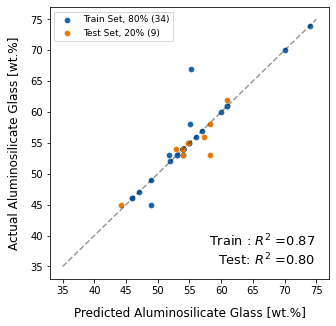

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(train_pred, redo_y_train, color='#1864AB', label='Train Set, 80% (34)', s=22)
ax.scatter(test_pred, redo_y_test, color='#E67700', label='Test Set, 20% (9)', s=22)

font = {'size':12}
font2 = {'size':14}
ax.set_xlabel("Predicted Aluminosilicate Glass [wt.%]", labelpad=10, fontdict=font)
ax.set_ylabel("Actual Aluminosilicate Glass [wt.%]", labelpad=10, fontdict=font)
# ax.set_title('Boosting Ensemble', fontdict=font2)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.legend(fontsize=9, loc="upper left")

# y=x dashed line
ax.plot([35,75], [35,75], c="k", linestyle='--',alpha=0.4)

ax.text(0.95, 0.05, f"Train : $R^2$ ={r2_score(redo_y_train, train_pred):0.2f}\nTest: $R^2$ ={r2_score(redo_y_test, test_pred):0.2f}",
        transform=ax.transAxes, fontsize=13, ha="right")

plt.savefig(f"./GradientBoostingRegressor_performance.png")

In [ ]:
arange_index = np.arange(X_train.columns.shape[0])

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.3 MB/s 


In [ ]:
shap_df = pd.concat([X_train, X_test])
shap_df.reset_index(inplace=True, drop=True)

In [ ]:
input_features = [u'Al\u2082O\u2083', 'CaO', u'Fe\u2082O\u2083', u'SiO\u2082', 'MgO', 'T. Alkali']
shap_df.columns=input_features
shap_df

,Al₂O₃,CaO,Fe₂O₃,SiO₂,MgO,T. Alkali
0,1.041869,-0.658911,-0.456573,0.644951,-1.040737,-0.103229
1,-1.286144,-0.190012,0.916659,0.866674,-0.584156,-1.026855
2,-0.405274,-0.346311,-1.173042,1.221430,-0.812447,-0.842130
3,1.733981,0.278888,0.558424,-0.729728,-0.355865,0.450947
4,0.412676,0.278888,-0.217750,-0.574522,0.329007,0.266222
5,-0.719871,2.988086,2.110774,-1.660962,1.242170,-0.842130
6,-2.041176,-0.398411,-0.456573,1.221430,-0.127574,0.450947
7,1.041869,-0.658911,-0.456573,0.644951,-1.040737,-0.103229
8,0.853111,-0.658911,0.558424,0.245851,-0.812447,-0.657405
9,-0.027759,-0.033712,-0.217750,-0.352800,0.785589,0.820398


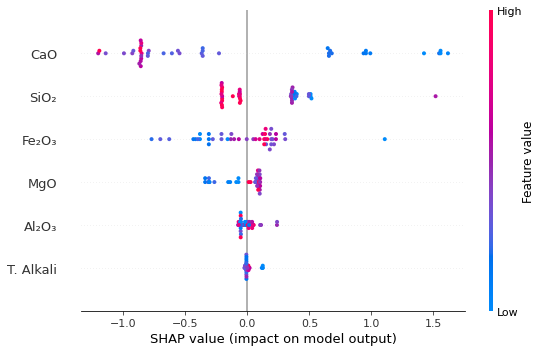

In [ ]:
import shap
import skimage

explainer = shap.TreeExplainer(gbr2)
shap_values = explainer.shap_values(shap_df)
fig=shap.summary_plot(shap_values, shap_df, show=False, plot_size=(8,5))
plt.savefig('./shap_plot.png')

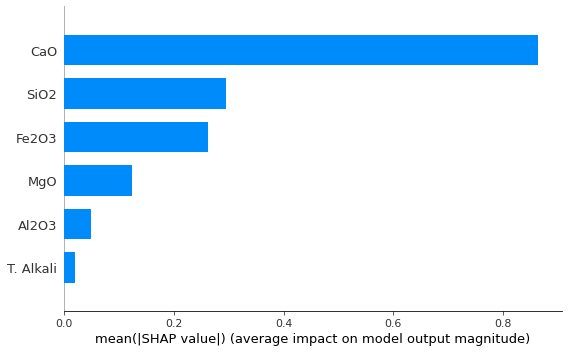

In [ ]:
shap.summary_plot(shap_values, feature_names = features, plot_type='bar', plot_size=(8,5))

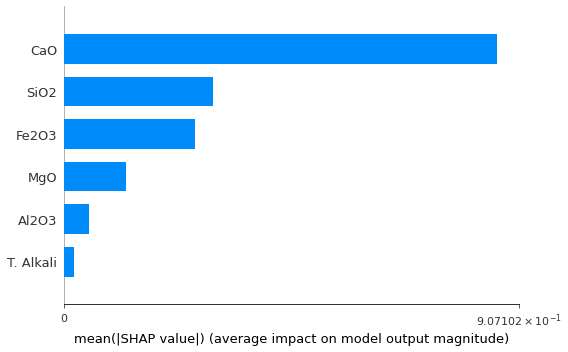

In [ ]:
shap.summary_plot(shap_values, feature_names = features, plot_type='bar', plot_size=(8,5), use_log_scale=True)